In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display

In [2]:
# Read and modify raw data
df = pd.read_csv('original.csv')
df = df.dropna()
df = df[(df['2003 [YR2003]'] == '0') | (df['2003 [YR2003]'] == '1')]

In [3]:
# Select only necessary questions (here and after "categories")
categories = list(df.groupby('Series Name').groups.keys())
categories = [
    categories[0],
    categories[1],
    categories[3],
    categories[23],
    categories[21],
    categories[16],
    categories[17],
    categories[19],
    categories[24],
    categories[4],
    categories[20],
    categories[5],
    categories[22],
    categories[18]
]
df_2 = df[df['Series Name'].isin(categories)]

In [4]:
# Export clear data
df_2.to_csv('dataset.csv')

In [5]:
# Read clear data. Invertion of all the questions was performed manually
df_3 = pd.read_csv('dataset-modified.csv')
years = list(df_3.columns[5:])
categories = df_3['Series Name'].unique()

In [6]:
for year in years:
    df_3[year] = df_3[year].map(lambda x: 0 if x == 1 else 1)

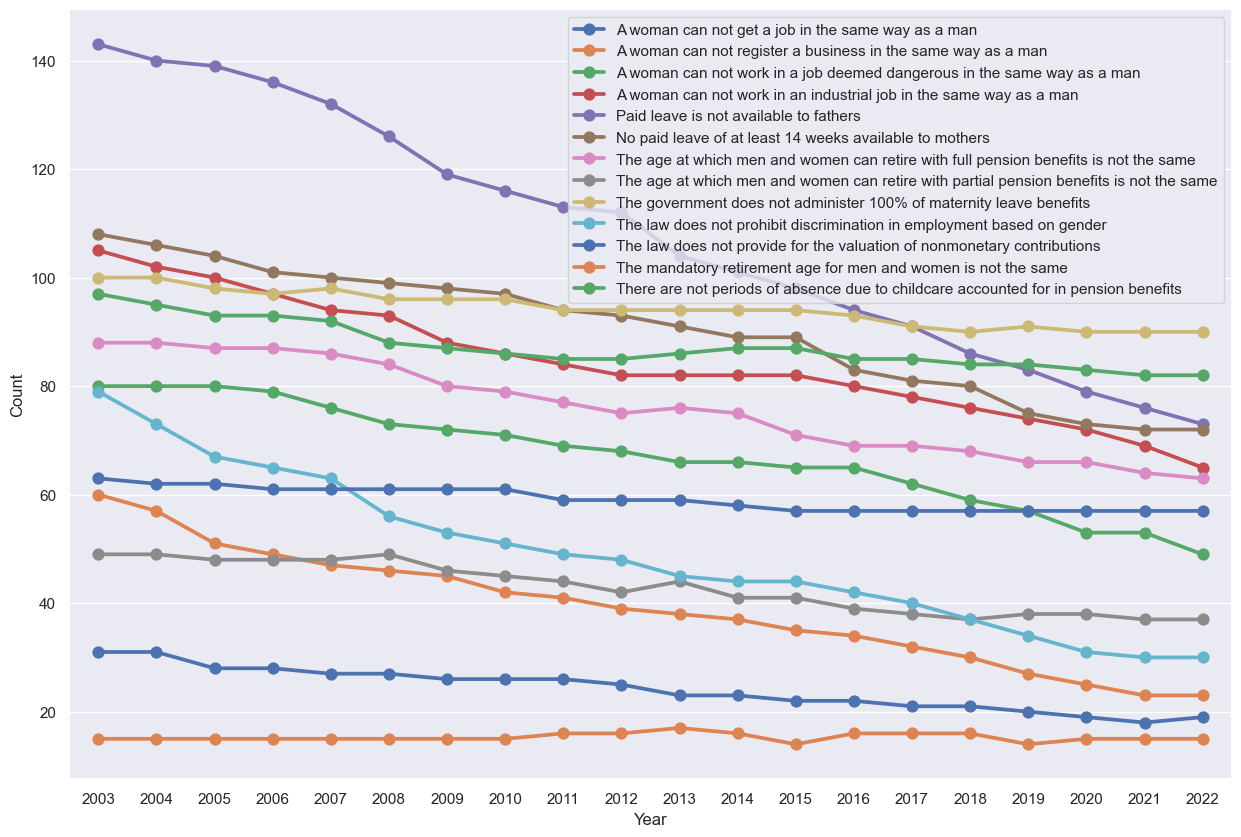

In [7]:
# Plot a chart for each of the categories
categories = df_3['Series Name'].unique()
sns.set(rc={'figure.figsize':(15,10)})
datasets = {}
for category in categories:
    data = df_3[df_3['Series Name'] == category]
    data_per_year = []
    for year in years:
        s = data[year].sum()
        data_per_year.append(s)
    res = pd.DataFrame({'year': years, 'count': data_per_year})
    datasets[category] = res
    chart = sns.pointplot(x='year', y='count', data=res, label=category)
    chart.set_xticks(years)
    chart.set(xlabel='Year', ylabel='Count')

The linear regression models were tested with mean squared error (MSE) for each of the category
The results are below


,Category,MSE
0,A woman can not get a job in the same way as a man,1.070000
1,A woman can not register a business in the same way as a man,2.290000
2,A woman can not work in a job deemed dangerous in the same way as a man,4.240000
3,A woman can not work in an industrial job in the same way as a man,6.300000
4,Paid leave is not available to fathers,2.930000
5,No paid leave of at least 14 weeks available to mothers,1.440000
6,The age at which men and women can retire with full pension benefits is not the same,0.890000
7,The age at which men and women can retire with partial pension benefits is not the same,1.780000
8,The government does not administer 100% of maternity leave benefits,0.710000
9,The law does not prohibit discrimination in employment based on gender,10.350000


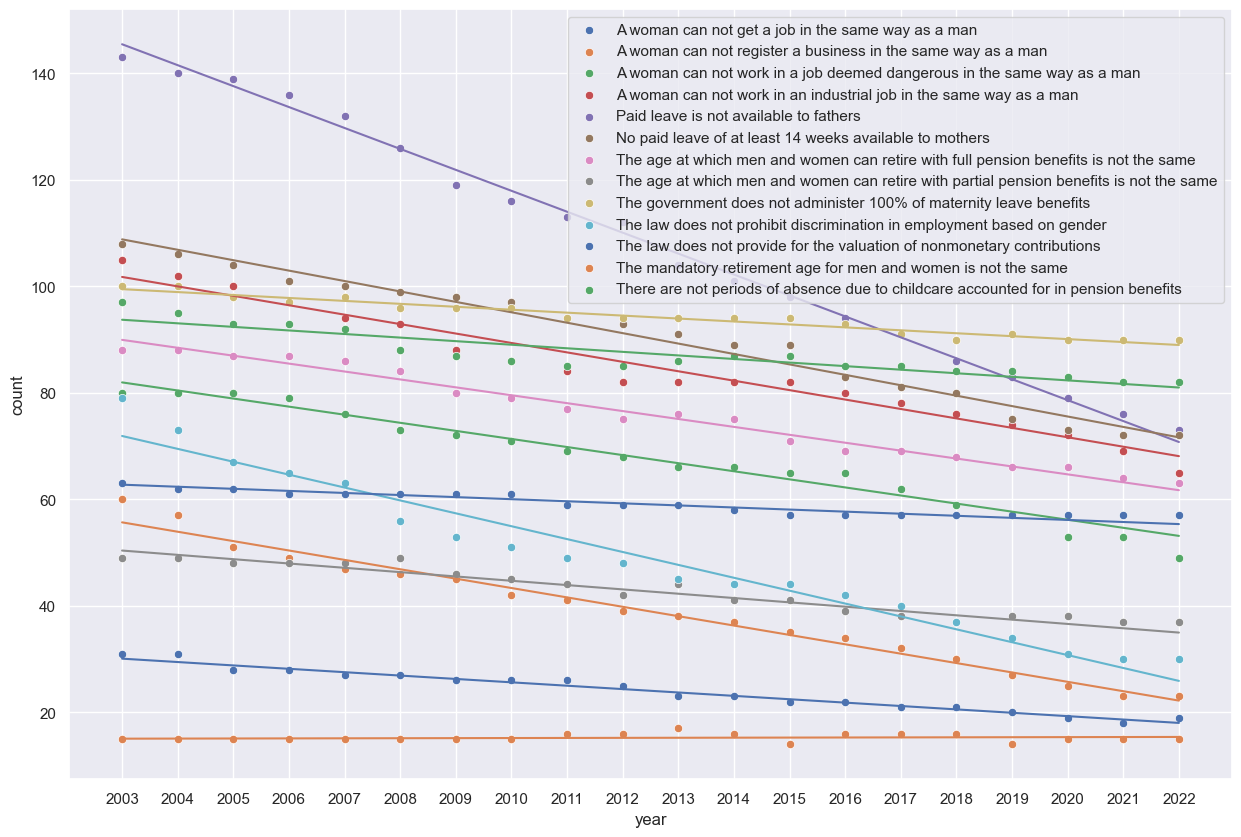

In [8]:
# Create a linear regression model for each of the categories and display the results

print("The linear regression models were tested with mean squared error (MSE) for each of the category")
print("The results are below")
df_metrics = pd.DataFrame({'Category': [], 'MSE': []})
for category in categories:
    data = datasets[category]
    X = data['year'].to_frame()
    y = data['count']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    df_metrics.loc[len(df_metrics)] = [category, round(mse, 2)]
    chart = sns.scatterplot(x=X['year'], y=y, label=category)
    sns.lineplot(x=X['year'], y=model.predict(X))

df_metrics.style